In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 25
FirstStim = 6.0
LastStim = 21.0
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))
emg = np.zeros([len(t), Nsim])

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 346122 synapses were built


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i])
        pools[2].atualizeAfferentPool(t[i])
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    for k in xrange(0, len(pools)):
        pools[k].reset()

80.205613 seconds
[ 0.]
[ 0.]
81.494759 seconds
[ 0.]
[ 0.]
84.662454 seconds
[ 0.]
[ 0.]
83.870023 seconds
[ 0.]
[ 0.]
83.225423 seconds
[ 0.]
[ 0.]
86.127786 seconds
[ 0.]
[ 0.05863496]
84.501199 seconds
[ 0.]
[ 0.59322872]
84.093504 seconds
[ 0.]
[ 1.04552096]
94.441386 seconds
[ 0.]
[ 1.78510393]
86.655577 seconds
[ 0.]
[ 2.59373923]
85.42983 seconds
[ 1.18884636]
[ 3.3708541]
89.919186 seconds
[ 1.98345372]
[ 3.41806987]
83.793473 seconds
[ 2.7689063]
[ 2.72728804]
85.093802 seconds
[ 3.3913024]
[ 2.03896841]
84.662849 seconds
[ 3.86036599]
[ 1.55791572]
86.283998 seconds
[ 4.21897089]
[ 1.07138265]
89.386562 seconds
[ 4.58009553]
[ 0.69991225]
87.204571 seconds
[ 4.77393904]
[ 0.42720944]
85.234443 seconds
[ 4.91791262]
[ 0.14116939]
83.458605 seconds
[ 4.99236084]
[ 0.00461926]
84.227372 seconds
[ 5.02129453]
[  7.30815742e-08]
86.018578 seconds
[ 5.00314443]
[  6.39312511e-08]
85.641874 seconds
[ 5.05031502]
[  5.49153157e-08]
98.727807 seconds
[ 5.0201016]
[  5.51717854e-08]
9

<IPython.core.display.Javascript object>


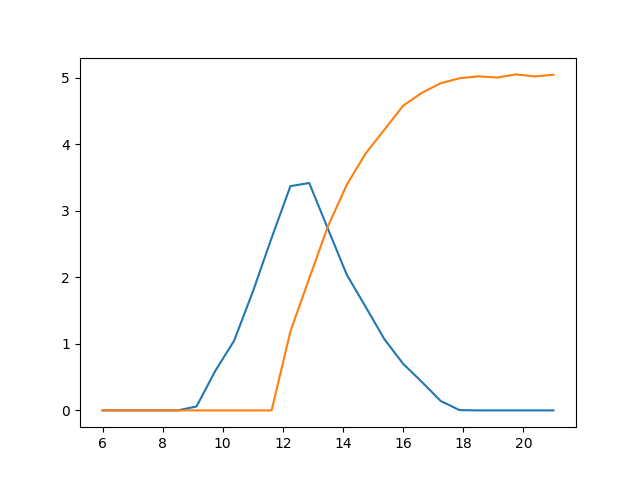

In [12]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.67680329957217489

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.18884636],
       [ 1.98345372],
       [ 2.7689063 ],
       [ 3.3913024 ],
       [ 3.86036599],
       [ 4.21897089],
       [ 4.58009553],
       [ 4.77393904],
       [ 4.91791262],
       [ 4.99236084],
       [ 5.02129453],
       [ 5.00314443],
       [ 5.05031502],
       [ 5.0201016 ],
       [ 5.04436799]])

<IPython.core.display.Javascript object>


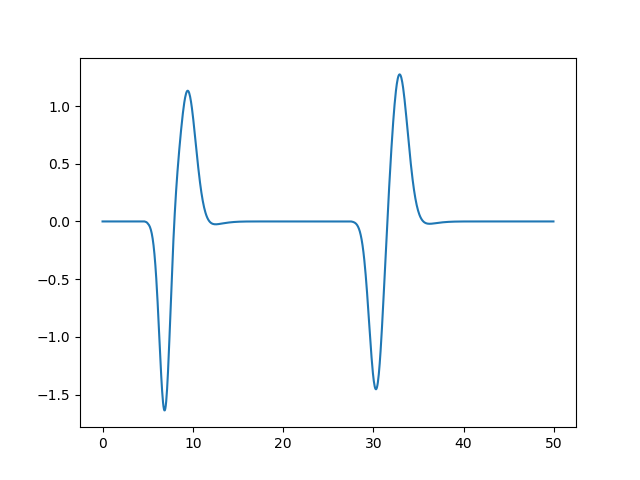

In [16]:
plt.figure()
plt.plot(t, emg[:,12])